# Training procedure for (see details in ../training/training.ipynb)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import ipyparallel as ipp

In [3]:
cluster = ipp.Cluster(engines='mpi', n=9)

In [4]:
rc = cluster.start_and_connect_sync()

Starting 9 engines with <class 'ipyparallel.cluster.launcher.MPIEngineSetLauncher'>


  0%|          | 0/9 [00:00<?, ?engine/s]

In [5]:
dv = rc[:]

In [6]:
import matplotlib.pyplot as plt
from fast.utils.img_loader import load_image_list_renormalize
from pathlib import Path

In [7]:
%%px --local
%load_ext autoreload
%autoreload 2

from fast.core import training
from pathlib import Path
import fast.input_params as inp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
%%px

from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()


In [9]:
#%%px
base_path = Path('selected_images/')
image_files_all = list(base_path.glob('*.tiff'))

In [10]:
images_all = load_image_list_renormalize(image_files_all, img_format='tiff')

In [11]:
image_files_all, len(image_files_all)

([PosixPath('selected_images/4.1.01.tiff'),
  PosixPath('selected_images/4.1.05.tiff'),
  PosixPath('selected_images/4.1.08.tiff'),
  PosixPath('selected_images/4.2.03.tiff'),
  PosixPath('selected_images/4.2.06.tiff'),
  PosixPath('selected_images/4.2.07.tiff'),
  PosixPath('selected_images/5.3.01.tiff'),
  PosixPath('selected_images/camera_new.tiff'),
  PosixPath('selected_images/5.1.12.tiff')],
 9)

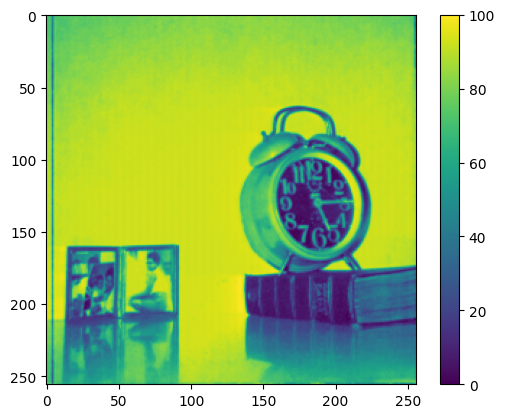

In [12]:
plt.imshow(images_all[-1])
plt.colorbar()

In [13]:
dv.scatter('images', images_all)
dv.scatter('images_name', image_files_all)

<AsyncResult(scatter): pending>

In [14]:
%%px
out_dir = Path('trained_models')/images_name[0].stem

### Generating and saving the training database.
Test c=2 only for now

In [15]:
%%px 
train_params = inp.TrainingInputParams(
                                   num_repeats_per_mask=1,
                                   measurements_per_initial_mask=10,
                                   test_c_values=[2], 
                                   verbose_training=False)

In [16]:
%%px
train_data_all = training.generate_training_databases(train_params=train_params, image_arrays=images, output_dir=out_dir)

[output:7]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:1]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:0]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:4]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:8]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:2]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:6]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:1]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:7]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:4]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:6]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:8]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:0]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:2]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:1]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:7]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:3]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:8]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:4]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:5]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:6]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:0]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:2]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:1]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:7]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:8]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:4]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:6]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:0]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:3]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:5]

Testing for c=   2; Samples:   0%|          | 0/1 [00:00<?, ?it/s]

[output:2]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:3]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:5]

Masks:   0%|          | 0/1 [00:00<?, ?it/s]

[output:5]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

[output:3]

Iterating through test sampling ratios.:   0%|          | 0/10 [00:00<?, ?it/s]

%px:   0%|          | 0/9 [00:00<?, ?tasks/s]

In [17]:
dv.gather('train_data_all')

<AsyncMapResult(gather): pending>

In [18]:
training_databases_all = dv['train_data_all']

### Example of training data:
1. measurement mask, 
2. the image reconstructed by interpolating the measured points, 
3. and the RDs for the unmeasured points.



Out[0:6]: <matplotlib.colorbar.Colorbar at 0x7f2e99067640>

Out[3:6]: <matplotlib.colorbar.Colorbar at 0x7fd7b1da7640>

Out[4:6]: <matplotlib.colorbar.Colorbar at 0x7f7e6dc0f640>

Out[7:6]: <matplotlib.colorbar.Colorbar at 0x7ff7109a7670>

Out[6:6]: <matplotlib.colorbar.Colorbar at 0x7f9bdf18b670>

Out[8:6]: <matplotlib.colorbar.Colorbar at 0x7f123403b670>

Out[5:6]: <matplotlib.colorbar.Colorbar at 0x7f67e80df640>

Out[2:6]: <matplotlib.colorbar.Colorbar at 0x7f2cf06bb640>

Out[1:6]: <matplotlib.colorbar.Colorbar at 0x7f420740b640>

[output:3]

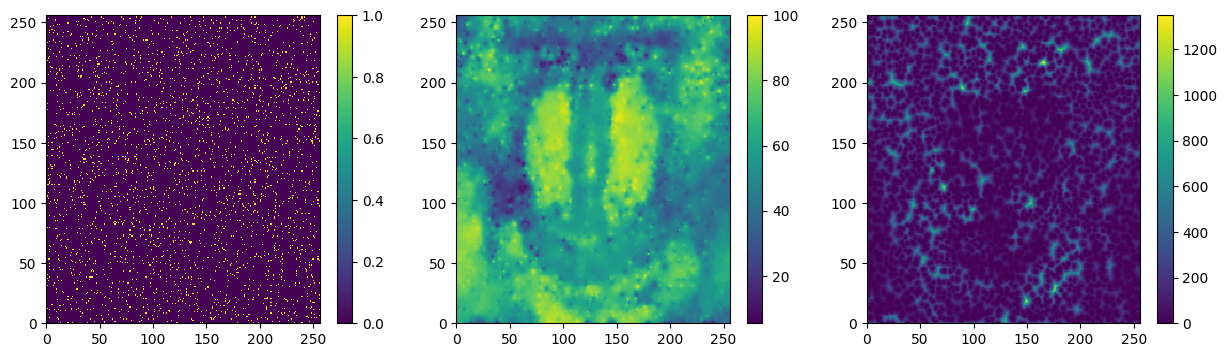

[output:7]

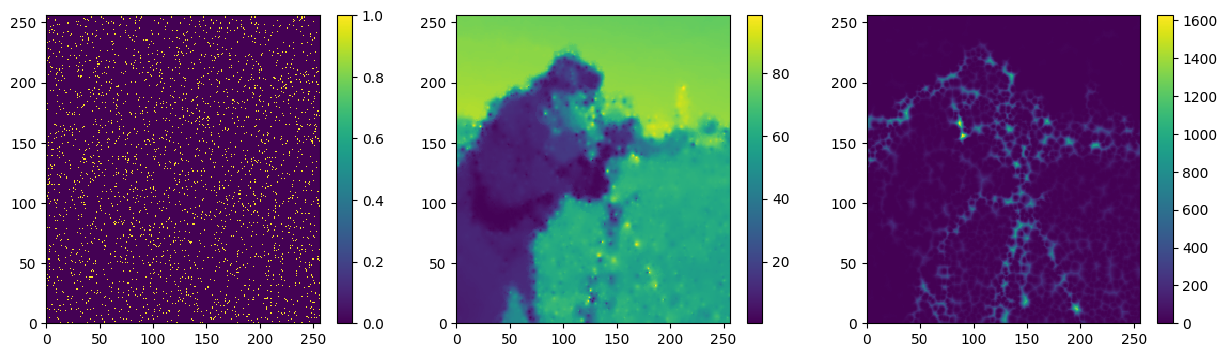

[output:0]

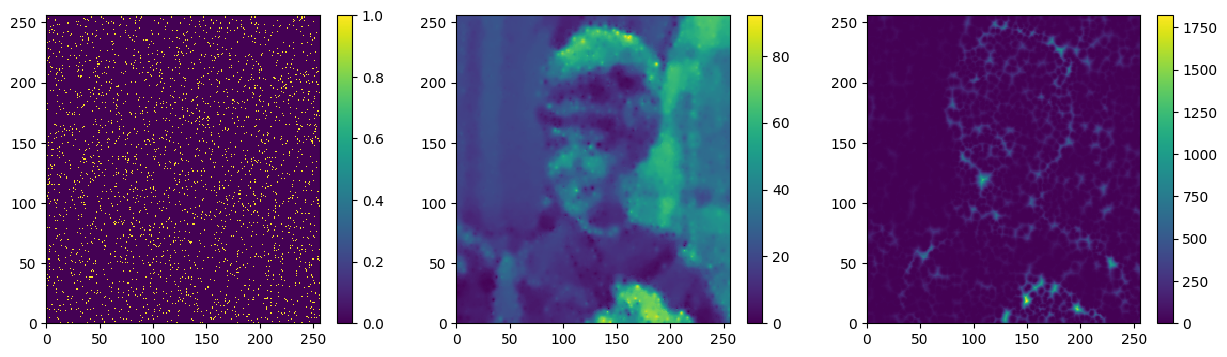

[output:2]

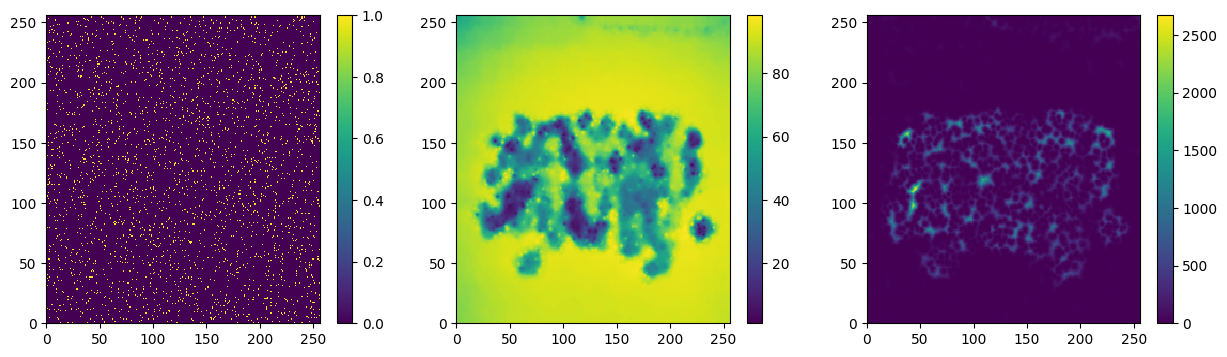

[output:8]

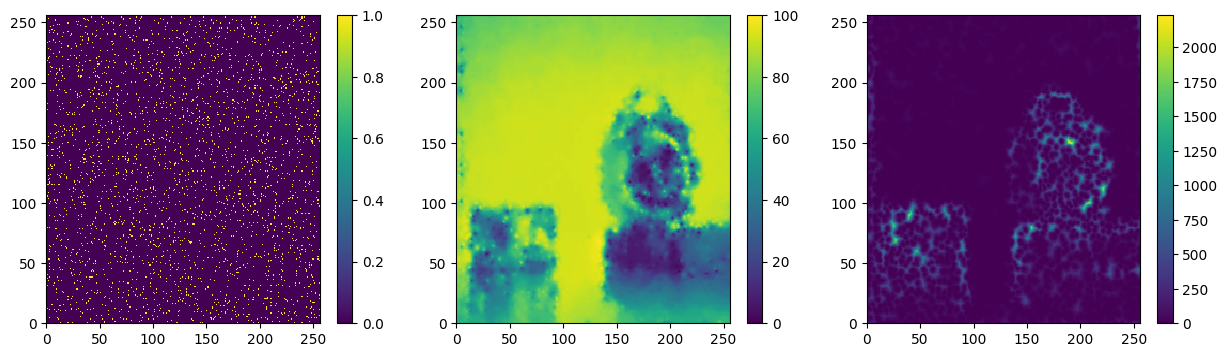

[output:1]

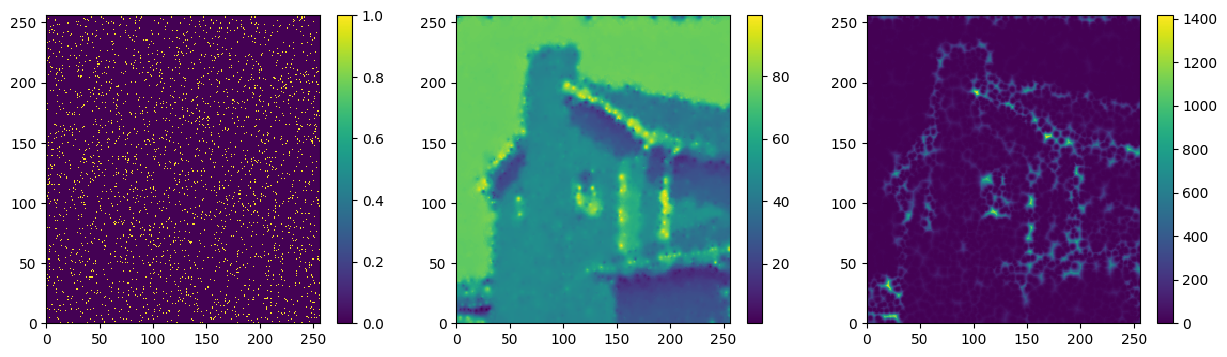

[output:4]

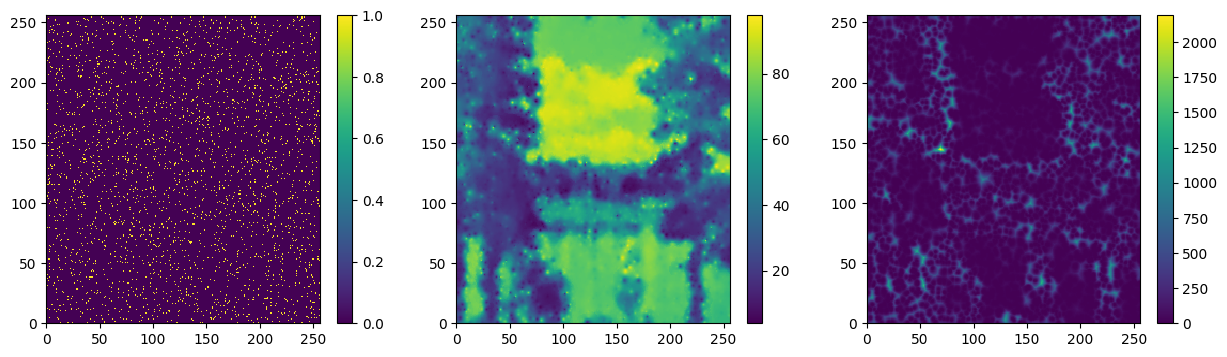

[output:5]

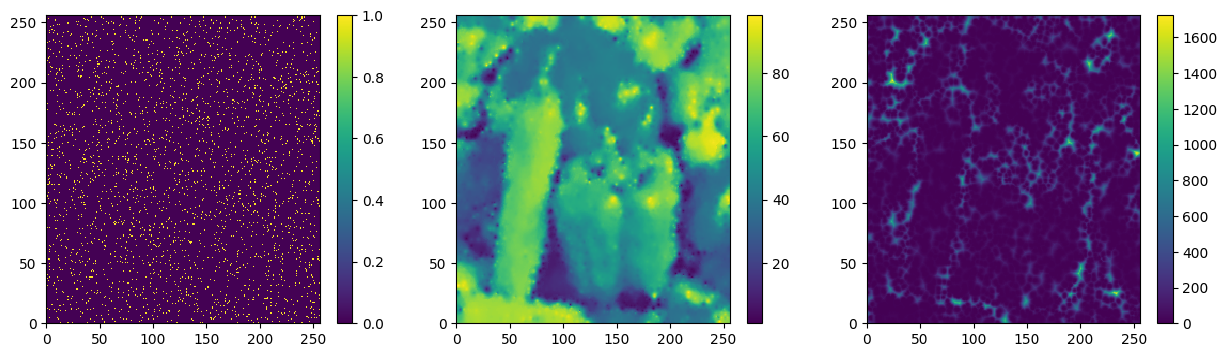

[output:6]

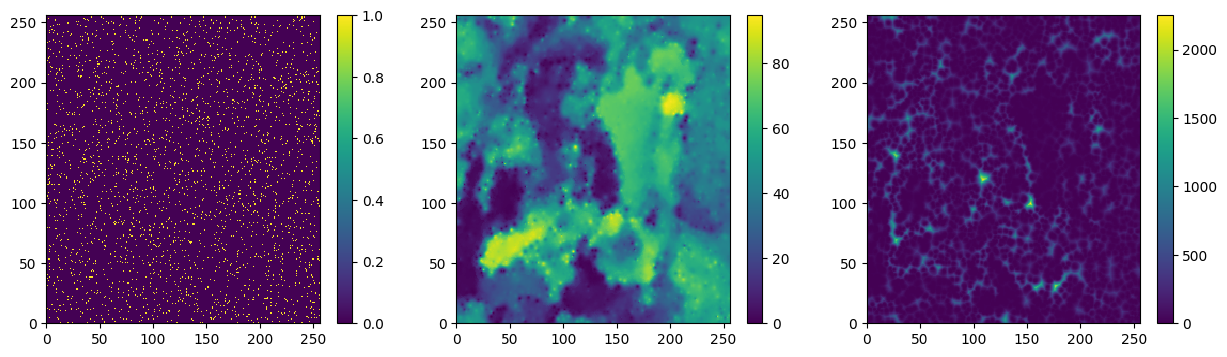

In [19]:
%%px
fig, axs = plt.subplots(1,3, figsize=[15, 4])
plt.subplot(1,3,1)
plt.pcolormesh(train_data_all[0].outputs.masks[0][::-1])
plt.colorbar()
plt.subplot(1,3,2)
plt.pcolormesh(train_data_all[0].outputs.recons[0][::-1])
plt.colorbar()
plt.subplot(1,3,3)
plt.pcolormesh(train_data_all[0].outputs.erds[0][::-1])
plt.colorbar()

### Generating the NN model and identifying the optimal value of $c$.

For each value of $c$:
1. Load the training database and split it into (training, validation) sets. 
2. Use the training set to train a multi-layer perceptron model (using sklearn).
3. Using this model, calculate the $R_{squared}$ for the fit of the validation set.

When we choose the value of $c$ with the highest $R_{squared}$, we get $c=2$.

In [20]:
%%px 
out_dir

Out[5:7]: PosixPath('trained_models/4.2.07')

Out[1:7]: PosixPath('trained_models/4.1.05')

Out[6:7]: PosixPath('trained_models/5.3.01')

Out[7:7]: PosixPath('trained_models/camera_new')

Out[4:7]: PosixPath('trained_models/4.2.06')

Out[3:7]: PosixPath('trained_models/4.2.03')

Out[2:7]: PosixPath('trained_models/4.1.08')

Out[0:7]: PosixPath('trained_models/4.1.01')

Out[8:7]: PosixPath('trained_models/5.1.12')

In [21]:
%%px
val_scores = {}
for c_value in tqdm(train_params.test_c_values):

    print('test c', c_value)

    features_erds_db_path = out_dir / Path(f'c_{c_value}') / 'training_database.pkl'

    val_scores[c_value] = []

    save_path = features_erds_db_path.parent / f'erd_model_relu.pkl'
    
    features_all, erds_all = training.get_features_and_erds_from_db(features_erds_db_path)
    train_feat, train_erds, val_feat, val_erds = training.training_validation_split(features_all, erds_all, training_split=0.8,random_seed=111)
    
    erd_model, _ = training.fit_erd_model((train_feat, train_erds),
                                          model_params=inp.SladsModelParams(max_iter=50),
                                          save_path=save_path,
                                          training_split=0.8, 
                                          random_seed = 111)
    score = training.validate_erd_model_r_squared((val_feat, val_erds),
                                                  erd_model_path=save_path,
                                                  random_seed = 111)
    print('R squared score', score)
    val_scores[c_value].append(score)
        
    


[output:1]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:0]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:6]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:7]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:2]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:8]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:4]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:3]

  0%|          | 0/1 [00:00<?, ?it/s]

[output:5]

  0%|          | 0/1 [00:00<?, ?it/s]

[stdout:1] test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.
Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.8275746687502712
R squared score 0.8275746687502712


[stdout:6] test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.
Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.8252761210052406
R squared score 0.8252761210052406


[stdout:0] test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.
Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.8250755859551329
R squared score 0.8250755859551329


[stdout:7] test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.
Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.8113808304506621
R squared score 0.8113808304506621


[stdout:2] test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.
Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.8051976145852493
R squared score 0.8051976145852493


[stdout:4] test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.
Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.845897987351233
R squared score 0.845897987351233


[stdout:3] test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.
Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.8776219486740029
R squared score 0.8776219486740029


[stdout:8] test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.
Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.7923469162289105
R squared score 0.7923469162289105


[stdout:5] test c 2
Ignoring the features db path and train/val split ratio.Directly loading the training features and erds instead.
Ignoring the features db path and train/val split ratio.Directly loading the features and erds instead.
Validation score is 0.8297948446650574
R squared score 0.8297948446650574


%px:   0%|          | 0/9 [00:00<?, ?tasks/s]

[stderr:7] /home/beams/SKANDEL/miniforge3/envs/fast/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[stderr:1] /home/beams/SKANDEL/miniforge3/envs/fast/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[stderr:5] /home/beams/SKANDEL/miniforge3/envs/fast/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[stderr:2] /home/beams/SKANDEL/miniforge3/envs/fast/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[stderr:6] /home/beams/SKANDEL/miniforge3/envs/fast/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[stderr:4] /home/beams/SKANDEL/miniforge3/envs/fast/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[stderr:8] /home/beams/SKANDEL/miniforge3/envs/fast/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[stderr:0] /home/beams/SKANDEL/miniforge3/envs/fast/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


[stderr:3] /home/beams/SKANDEL/miniforge3/envs/fast/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
%px val_scores

Out[3:9]: {2: [0.8776219486740029]}

Out[5:9]: {2: [0.8297948446650574]}

Out[1:9]: {2: [0.8275746687502712]}

Out[4:9]: {2: [0.845897987351233]}

Out[2:9]: {2: [0.8051976145852493]}

Out[7:9]: {2: [0.8113808304506621]}

Out[6:9]: {2: [0.8252761210052406]}

Out[8:9]: {2: [0.7923469162289105]}

Out[0:9]: {2: [0.8250755859551329]}

In [23]:
%px images_name

Out[3:10]: [PosixPath('selected_images/4.2.03.tiff')]

Out[1:10]: [PosixPath('selected_images/4.1.05.tiff')]

Out[5:10]: [PosixPath('selected_images/4.2.07.tiff')]

Out[7:10]: [PosixPath('selected_images/camera_new.tiff')]

Out[2:10]: [PosixPath('selected_images/4.1.08.tiff')]

Out[4:10]: [PosixPath('selected_images/4.2.06.tiff')]

Out[0:10]: [PosixPath('selected_images/4.1.01.tiff')]

Out[6:10]: [PosixPath('selected_images/5.3.01.tiff')]

Out[8:10]: [PosixPath('selected_images/5.1.12.tiff')]

In [24]:
%px out_dir

Out[7:11]: PosixPath('trained_models/camera_new')

Out[1:11]: PosixPath('trained_models/4.1.05')

Out[3:11]: PosixPath('trained_models/4.2.03')

Out[5:11]: PosixPath('trained_models/4.2.07')

Out[4:11]: PosixPath('trained_models/4.2.06')

Out[0:11]: PosixPath('trained_models/4.1.01')

Out[2:11]: PosixPath('trained_models/4.1.08')

Out[8:11]: PosixPath('trained_models/5.1.12')

Out[6:11]: PosixPath('trained_models/5.3.01')

In [25]:
rc.shutdown(hub=True)

engine set stopped 1676434891: {'exit_code': 0, 'pid': 1905619, 'identifier': 'ipengine-1676434890-ga2k-1676434891-1905515'}
Controller stopped: {'exit_code': 0, 'pid': 1905548, 'identifier': 'ipcontroller-1676434890-ga2k-1905515'}
